<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="uoc_masterbrand_2linies_negatiu_blau_clar.png" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2859 Visualización de datos PEC2</p>
<p style="margin: 0; text-align:right;">2023-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC2 Estudio de técnicas de visualización de datos

En esta actividad el estudiante tendrá que crear tres pequeñas visualizaciones usando técnicas diferentes. Cada estudiante tendrá que escoger unos datos idóneos para cada una de las técnicas propuestas y decidir con qué software las crea. En este caso, se escoge python como software y las técnicas son: 

 <ol start="1">
  <li>Pyramid Charts</li>
  <li>Venn Diagrams</li>
  <li>OHLC Charts</li>
</ol>
   


<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: FRANCISCO JAVIER GHERSI LAZARO</strong>
</div>

# Pyramid Charts

Fuente del conjunto de datos: [Population pyramid by country from 1950-2022](https://www.kaggle.com/datasets/prasertk/population-pyramid-by-country-from-19502022)
El dataset presenta el cambio en la forma de la pirámide de población de varios paises en siete décadas.
En particular, visualizamos la piramide de población de España en el año 2022:

In [10]:
# Import Libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Carga datos
csv = 'population_pyramid_1950-2022.csv'
df = pd.read_csv(csv)

df_Spain = df.loc[(df['Country'] == 'Spain') & (df['Year'] == 2022)]

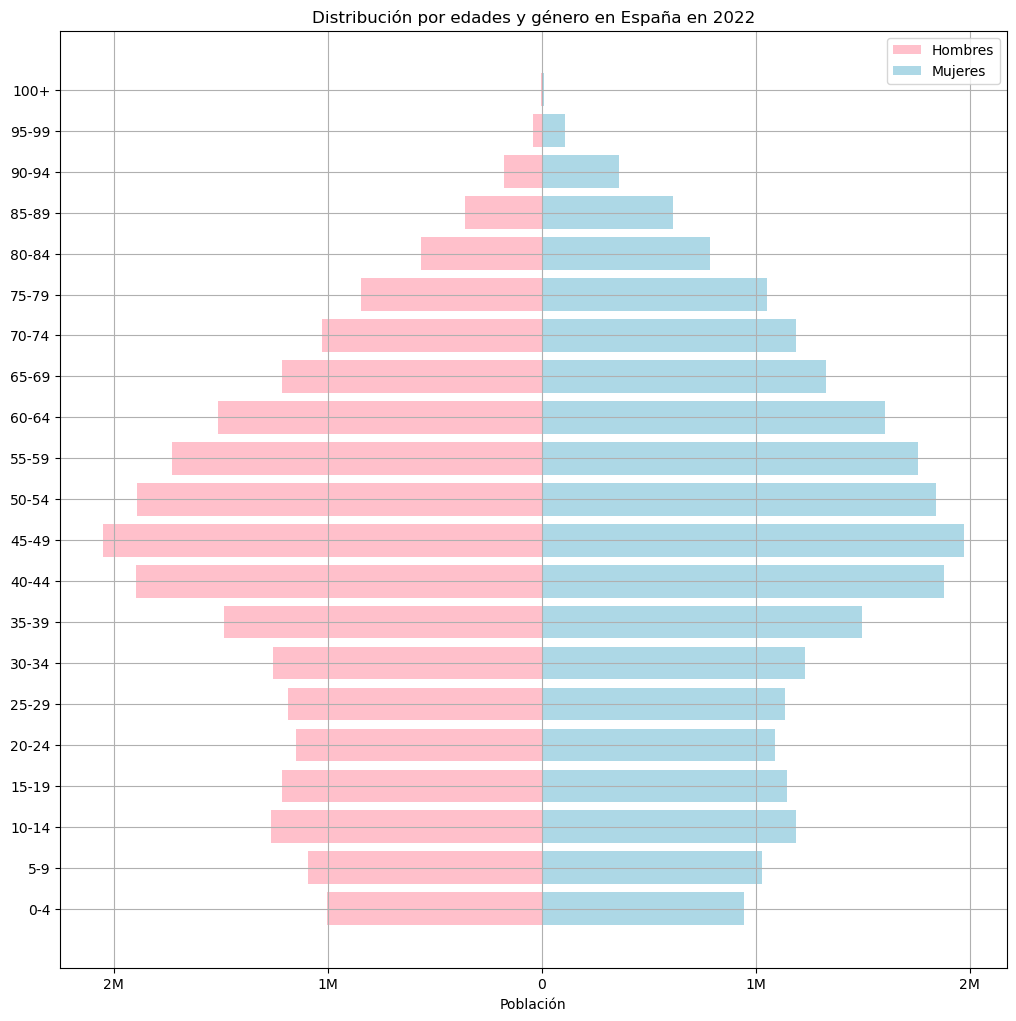

In [21]:
df_Spain['M'] = df_Spain['M'] / -1000
df_Spain['F'] = df_Spain['F'] / 1000
fig, ax = plt.subplots()
# Dibujar barras para hombres y mujeres
ax.barh(df_Spain.Age, df_Spain.M, color='pink', label='Hombres')
ax.barh(df_Spain.Age, df_Spain.F, color='lightblue', label='Mujeres')

# Ajustar la estética del gráfico
plt.xlabel('Población')
plt.title('Distribución por edades y género en España en 2022')
plt.xticks(ticks=[-2000, -1000, 0, 1000, 2000],
           labels=['2M', '1M', '0', '1M', '2M'])


plt.legend()
plt.grid(True)
plt.tight_layout()

plt.gcf().set_size_inches(10, 10)
# Mostrar el gráfico
plt.show()

# Venn Diagrams

Fuente del conjunto de datos: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)
El dataset presenta el training set de la información de los pasajeros del Titanic como nombre, edad, sexo, clase socioeconómica, etc.
En particular, visualizamos los conjuntos de clase de pasaje, sexo, edad categorizada y supervivencia donde el diagrama nos presenta la coincidencias entre clases en la intersección de conjuntos y, en particular, con el conjunto superviviente:

In [22]:
from venndata import venn
import matplotlib


In [23]:
df = pd.read_csv('train.csv')


In [24]:
df['Pclase1'] = df.Pclass.apply(lambda x: 1 if x==1 else 0)
df['Pclase2'] = df.Pclass.apply(lambda x: 1 if x==2 else 0)
df['Pclase3'] = df.Pclass.apply(lambda x: 1 if x==3 else 0)
df['Hombre'] = df.Sex.apply(lambda x: 1 if x=='male' else 0)
df['Mujer'] = df.Sex.apply(lambda x: 1 if x=='female' else 0)
df['Senior'] = df.Age.apply(lambda x: 1 if x>60 else 0)
df['Menor'] = df.Age.apply(lambda x: 1 if x<16 else 0)


In [25]:
df2 = df[['Survived', 'Pclase1', 'Pclase2', 'Pclase3', 'Hombre', 'Mujer',]]

df3 = df[['Survived','Menor', 'Hombre', 'Mujer', 'Senior']]

matplotlib.rcParams['figure.figsize'] = [15, 15]



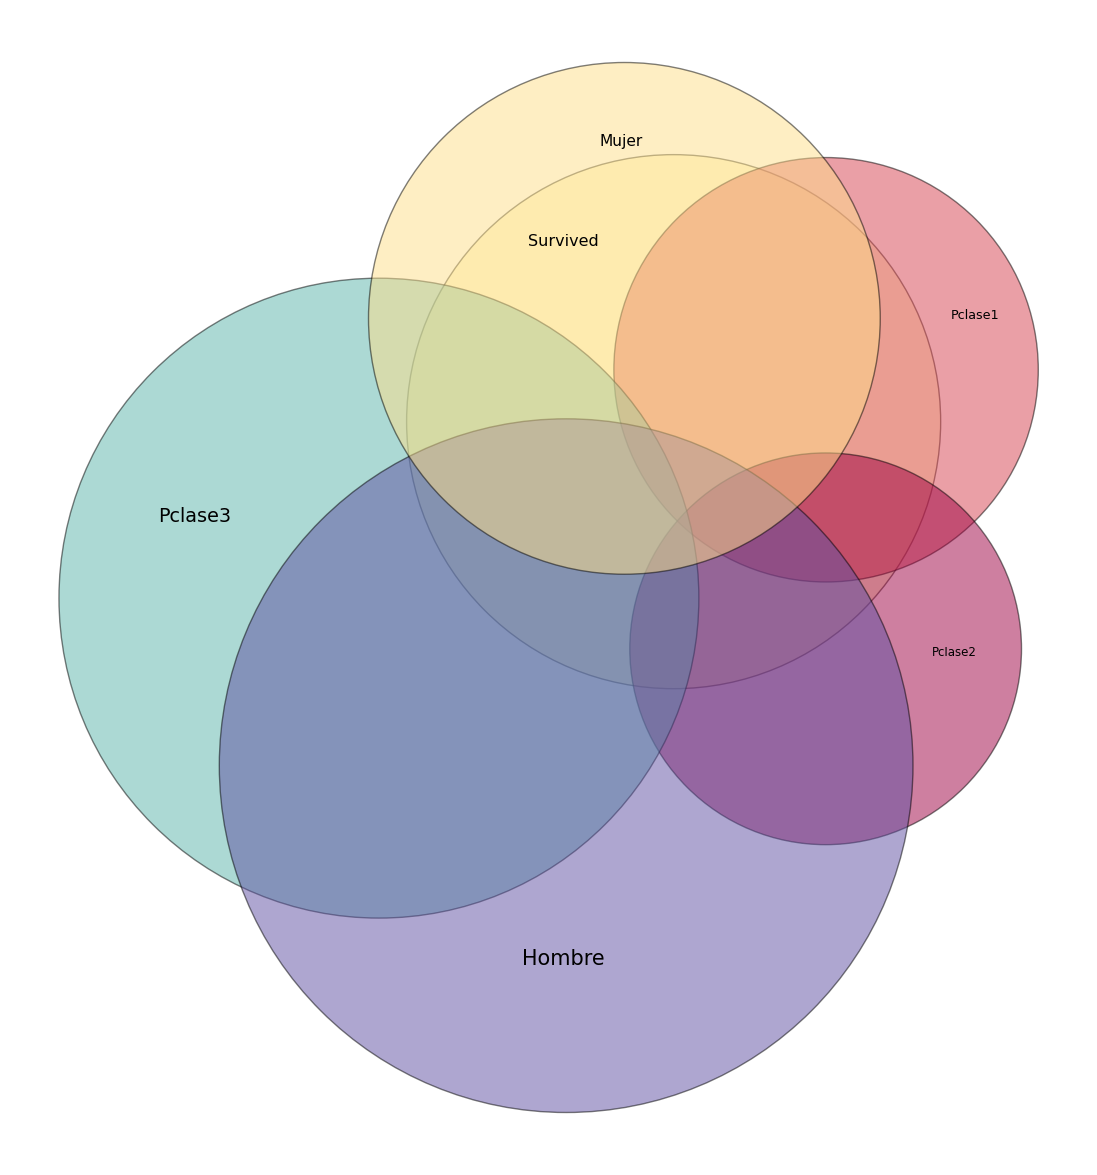

In [26]:
fineTune=False
labels, radii, actualOverlaps, disjointOverlaps = venn.df2areas(df2, fineTune=fineTune)


fig, ax = venn.venn(radii, actualOverlaps, disjointOverlaps, labels=labels, labelsize='auto', cmap=matplotlib.colormaps['Spectral'], fineTune=fineTune)


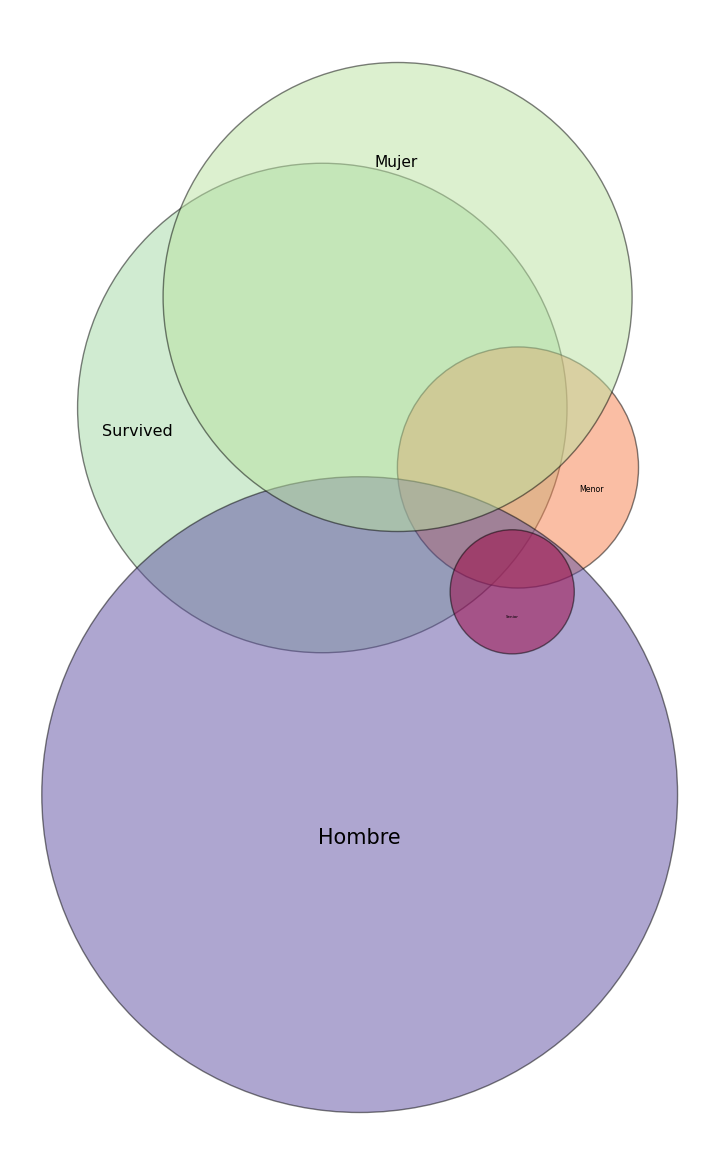

In [19]:
labels, radii, actualOverlaps, disjointOverlaps = venn.df2areas(df3, fineTune=fineTune)


fig, ax = venn.venn(radii, actualOverlaps, disjointOverlaps, labels=labels, labelsize='auto', cmap=matplotlib.colormaps['Spectral'], fineTune=fineTune)


# OHLC Chart

Fuente del conjunto de datos: [400+ crypto currency pairs at 1-minute resolution](https://www.kaggle.com/datasets/tencars/392-crypto-currency-pairs-at-minute-resolution/data?select=1inchusd.csv)
El dataset  contiene los datos históricos de negociación (OHLC) de criptomonedas con más de 400 pares de negociación y una resolución de 1 minuto que se remontan hasta el año 2013.
En particular, visualizamos las transacciones de Bitcoin US el 16 de Mayo de 2019 en una serie temporal que recoge una devaluación de carácter especulativa:

In [27]:
import pandas as pd
import mplfinance as fplt
from datetime import datetime

In [34]:
BTC_USD = pd.read_csv('btcusd.csv')

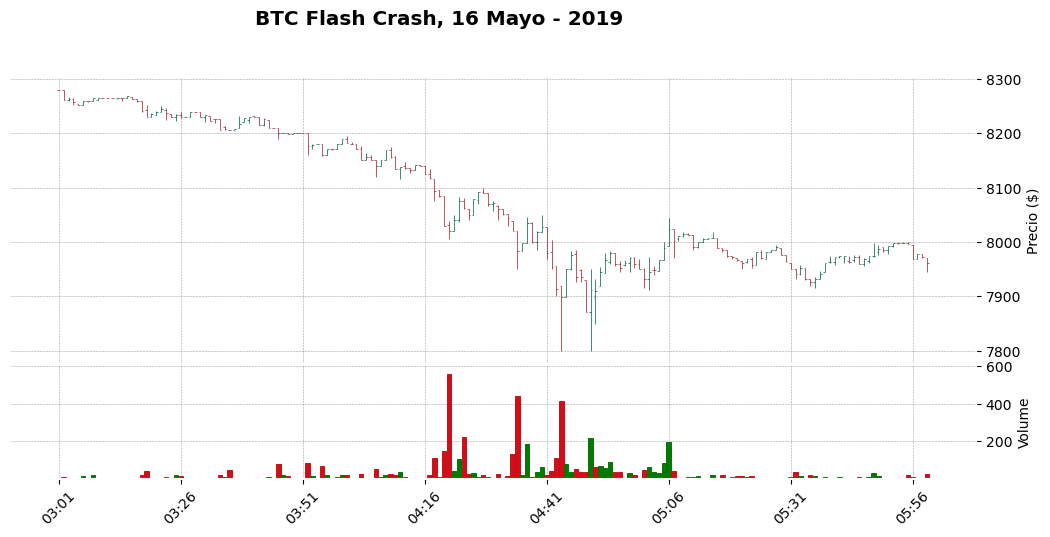

In [35]:
BTC_USD_min_FC = BTC_USD[(BTC_USD['time']/1000>1557975600) & (BTC_USD['time']/1000<1557986400)].reset_index(drop = True)
BTC_USD_min_FC['time'] = [pd.to_datetime(datetime.utcfromtimestamp(BTC_USD_min_FC.time[i]/1000).strftime('%Y-%m-%d %H:%M:%S')) for i in range(len(BTC_USD_min_FC))]
BTC_USD_min_FC = BTC_USD_min_FC.set_index('time')
fplt.plot(
    BTC_USD_min_FC,
    type='ohlc',
    style='charles',
    title='BTC Flash Crash, 16 Mayo - 2019',
    figratio=(28,12),
    ylabel='Precio ($)',
    volume=True
            )